# Behavioural Finance (Utility function for financial gain or loss & Market Risk Premium)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Simulation

In [2]:
epsilon = np.random.randn(10000)
simulation = pd.DataFrame(epsilon, columns = ['ε'])
simulation['g'] = np.exp(0.02 + 0.02 * simulation['ε'])

### Bisection Searching

In [3]:
def error(x1, x2, b):
    x = 0.5 * (x1 + x2)
    utility = []
    for g in simulation['g']:
        r = x * g
        if r >= 1.0303:
            utility.append(r - 1.0303)
        else:
            utility.append(2 * (r- 1.0303))
    expected_utility = np.mean(utility)
    e = 0.99 * b * expected_utility + 0.99 * x - 1
    return e

In [4]:
def bisection(x1, x2, b):
    e = error(x1, x2, b)
    x = 0.5 * (x1 + x2)
    while np.abs(e) >= 1e-5:
        if e < 0:
            x1 = x
        else:
            x2 = x
        e = error(x1, x2, b)
        x = 0.5 * (x1 + x2)
        if np.abs(e) < 1e-5:
            break
    return x

In [5]:
b0 = np.arange(0, 10.1, 0.1)
equilibrium_x = []
for b in b0:
    equilibrium_x.append(bisection(1, 1.1, b))
equilibrium = pd.DataFrame([b0, equilibrium_x], index = ['b0', 'x']).T

In [6]:
price_dividend_ratio = []
for x in equilibrium_x:
    price_dividend_ratio.append(1/(x - 1))

equilibrium['P/D'] = price_dividend_ratio

In [7]:
Rf = 1.0303
expected_rm = []
for x in equilibrium_x:
    xg = []
    for g in simulation['g']:
        xg.append(x * g)
    expected_rm.append(np.mean(xg))
equilibrium['expected_rm'] = expected_rm
equilibrium['Equity Premium'] = (equilibrium['expected_rm'] - Rf) * 100
equilibrium.head()

,b0,x,P/D,expected_rm,Equity Premium
0,0.0,1.010107,98.937198,1.030768,0.046755
1,0.1,1.010754,92.985244,1.031428,0.112776
2,0.2,1.011255,88.850325,1.031938,0.163848
3,0.3,1.011646,85.870021,1.032337,0.203710
4,0.4,1.011975,83.506626,1.032673,0.237343


### Visualization

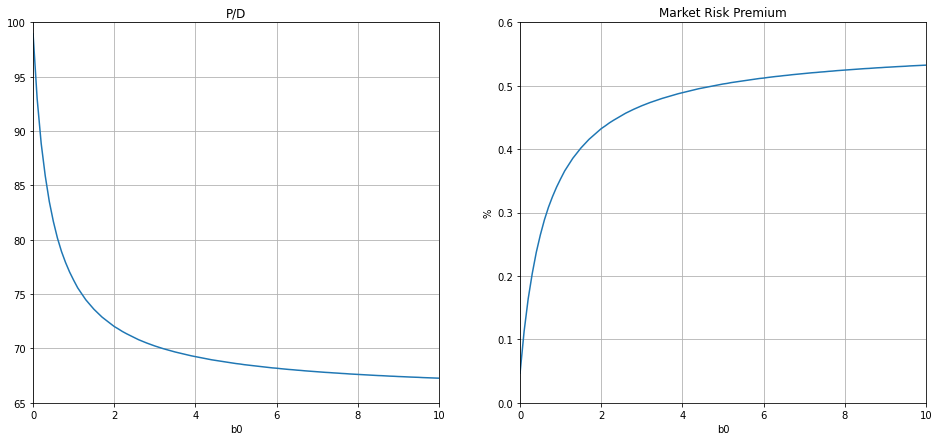

In [8]:
fig = plt.figure(figsize = (16, 7))
ax = fig.add_subplot(121)
plt.plot(equilibrium['b0'], equilibrium['P/D'])
plt.xlim(0, 10)
plt.ylim(65, 100)
plt.xlabel('b0')
plt.title('P/D')
plt.grid()

ax = fig.add_subplot(122)
plt.plot(equilibrium['b0'], equilibrium['Equity Premium'])
plt.xlim(0, 10)
plt.ylim(0, 0.6)
plt.xlabel('b0')
plt.ylabel('%')
plt.title('Market Risk Premium')
plt.grid()
plt.show()

> **Economic Significance**

- **Utility function for financial gain or loss**
<br>The piece-wise linear utility function measures investors' utility from financial gain or loss. Based on prospect theory, investors exhibit loss aversion for they are more sensitive to losses than gains, which are measured relative to reference level. So the utility function is more steeper when losses below the reference level than when gains above the reference level.
<br>

- **b0**
<br>b0 is a constant greater than or equal to 0, and it's part of the scale factor in investors' utility function, which consists of utility of consumption and utility of financial gain or loss. b0 determines amount of emphasis investor puts on utility from financial gain or loss, vs utility of consumption. If b0 = 0, investors' utility is only from individual consumption. If b0 becomes infinitely, investors' utility is almost determined by financial gain or loss.
<br>

- **λ**
<br>λ measures the investor sensitivity level to shortfall in financial gain, so λ > 1, making the utility function of financial gain or loss more steeper below the reference level. The bigger the λ, the more loss averse the investor is.